In [66]:
from datetime import datetime

import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_parquet("../data/listening_history_with_internet_data.parquet")

In [67]:
# Top 10 artists by hours played
results = (
    df
    .groupby('artist_name')
    .agg(
        hours_played=('hours_played', lambda x: x.sum().round(2)),
        full_play_count=('full_play', 'sum'),
        skip_count=('full_play', lambda x: (~x).sum()),
    )
    .reset_index()
    .sort_values('hours_played', ascending=False)
    .head(10)
)
results

,artist_name,hours_played,full_play_count,skip_count
2932,Lana Del Rey,144.21,1708,2362
2696,Kanye West,133.60,1744,2072
1589,Eminem,122.14,1466,3769
5396,"Tyler, The Creator",121.49,1708,2575
1995,Gorillaz,113.80,1860,3514
1334,Die Orsons,103.03,1379,2420
2745,Kendrick Lamar,88.85,1016,1465
3227,Mac Miller,83.77,1041,1512
5195,The Strokes,82.25,1229,1580
1809,Frank Ocean,74.09,1016,1222


<Figure size 1200x600 with 0 Axes>

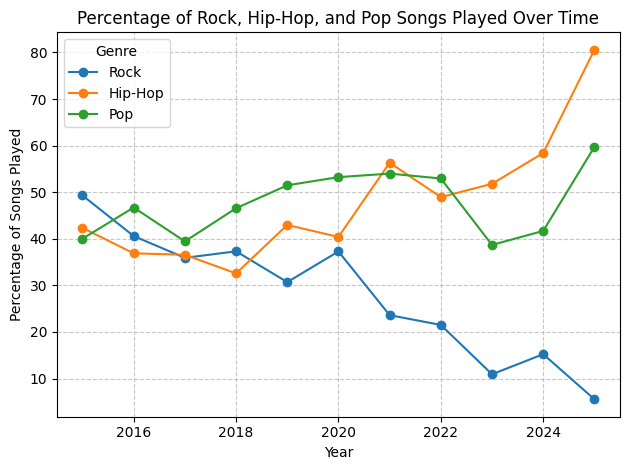

In [73]:
# Percentage of Rock, Hip-Hop, and Pop songs played over time since 2014
genre_by_year = (
    df[df["full_play"] & (df['ts'] >= datetime(2014, 1, 1))]
    .assign(
        year=lambda x: x['ts'].dt.year,
        is_rock=lambda x: x['artist_genres'].str.contains('rock', case=False),
        is_hiphop=lambda x: x['artist_genres'].str.contains('hip.?hop', case=False, regex=True),
        is_pop=lambda x: x['artist_genres'].str.contains('pop', case=False)
    )
    .groupby('year')
    .agg(
        rock_full_play=('is_rock', 'sum'),
        hiphop_full_play=('is_hiphop', 'sum'),
        pop_full_play=('is_pop', 'sum'),
        total_full_play=('full_play', 'sum')
    )
    .assign(
        rock_percent=lambda x: (x['rock_full_play'] / x['total_full_play'] * 100).round(2),
        hiphop_percent=lambda x: (x['hiphop_full_play'] / x['total_full_play'] * 100).round(2),
        pop_percent=lambda x: (x['pop_full_play'] / x['total_full_play'] * 100).round(2)
    )
)

# Create the plot
plt.figure(figsize=(12, 6))
genre_by_year[['rock_percent', 'hiphop_percent', 'pop_percent']].plot(kind='line', marker='o')
plt.title('Percentage of Rock, Hip-Hop, and Pop Songs Played Over Time')
plt.xlabel('Year')
plt.ylabel('Percentage of Songs Played')
plt.legend(['Rock', 'Hip-Hop', 'Pop'], title='Genre')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()